In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# read data
# using PAMAP2 dataset
raw_data_path = '../data/CleanedData.csv'
data=pd.read_csv(raw_data_path)
activityIDdict = {1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running'}
# add activity name
data['activityName'] = data['activityID'].map(activityIDdict)
print(data.shape)
data.head()

(904602, 17)


,timestamp,activityID,heartrate,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,subject_id,activityName
0,37.66,1,100.0,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1,lying
1,37.67,1,100.0,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1,lying
2,37.68,1,100.0,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1,lying
3,37.69,1,100.0,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1,lying
4,37.70,1,100.0,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1,lying


walking     238761
lying       192523
standing    189931
sitting     185188
running      98199
Name: activityName, dtype: int64

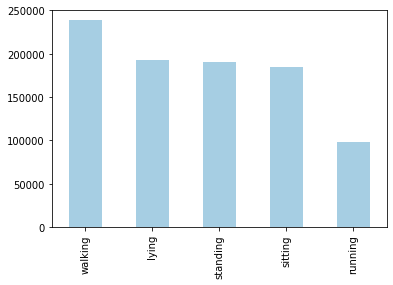

In [4]:
# activity distribution
data['activityName'].value_counts().plot(kind='bar',colormap='Paired',stacked=True)

In [16]:
# Data balancing: down sampling
balanced_data = pd.DataFrame()
balanced_count = data['activityName'].value_counts().min()
for activity in data['activityName'].unique():
    balanced_data=balanced_data.append(data[data['activityName']==activity].head(balanced_count).copy())

/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_10178/3646474772.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data=balanced_data.append(data[data['activityName']==activity].head(balanced_count).copy())
/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_10178/3646474772.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data=balanced_data.append(data[data['activityName']==activity].head(balanced_count).copy())
/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_10178/3646474772.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data=balanced_data.append(data[data['activityName']==activity].head(balanced_count).copy())
/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn

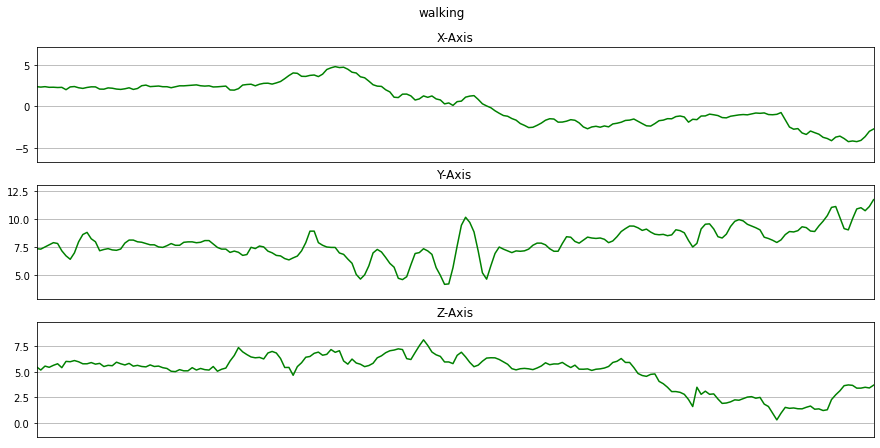

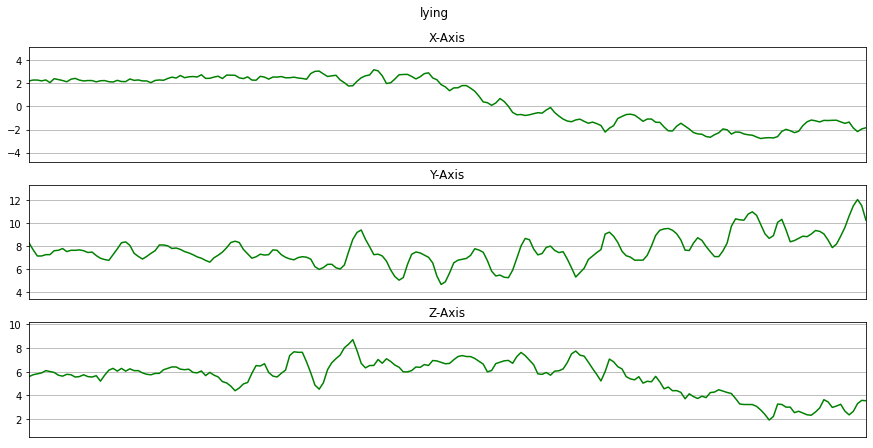

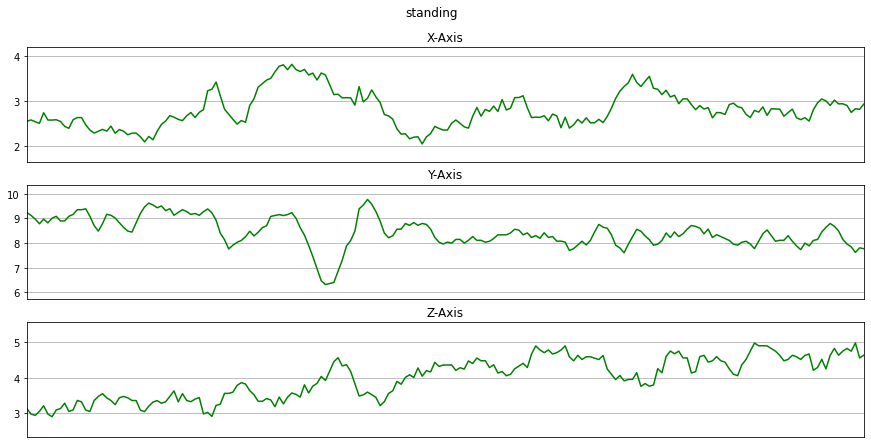

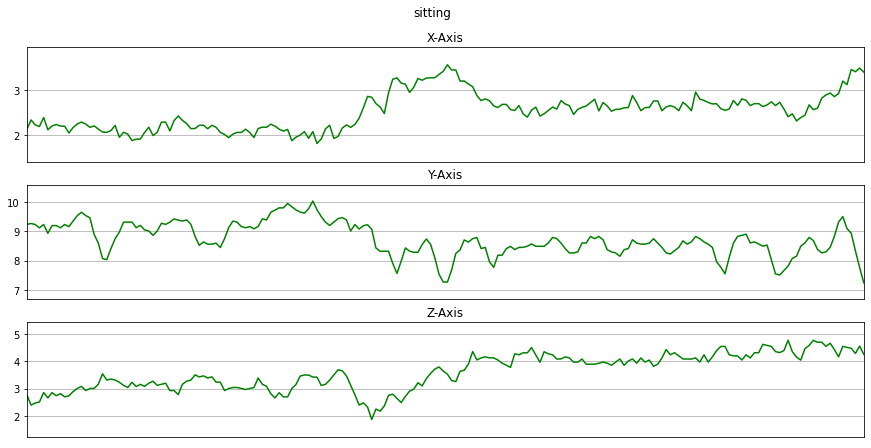

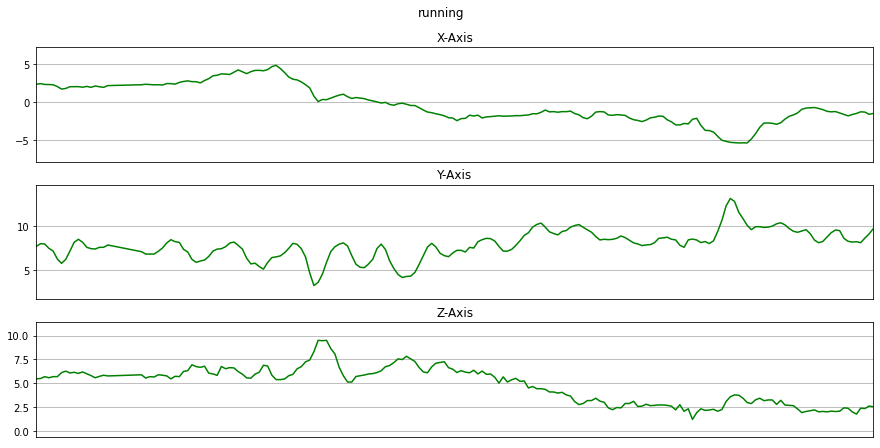

In [21]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['timestamp'], data['handAcc16_1'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['handAcc16_2'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['handAcc16_3'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
activities =  data['activityName'].unique()
for activity in activities:
    Fs = 20
    data_for_plot = data[(data['activityName'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [22]:
data['activityName'].value_counts()

walking     238761
lying       192523
standing    189931
sitting     185188
running      98199
Name: activityName, dtype: int64

In [14]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [15]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['activityName'])
data.head()

,timestamp,activityID,heartrate,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,subject_id,activityName,label
0,37.66,1,100.0,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1,lying,0
1,37.67,1,100.0,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1,lying,0
2,37.68,1,100.0,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1,lying,0
3,37.69,1,100.0,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1,lying,0
4,37.70,1,100.0,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1,lying,0


In [24]:
label.classes_

array(['lying', 'running', 'sitting', 'standing', 'walking'], dtype=object)

In [25]:
data.keys()

Index(['timestamp', 'activityID', 'heartrate', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'subject_id', 'activityName', 'label'],
      dtype='object')

In [26]:
X = data[['heartrate', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3']]
y = data['label']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['heartrate', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3'])
scaled_X['label'] = y.values

scaled_X.head(6)

,heartrate,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,label
0,0.079124,0.879375,0.632266,0.557569,0.871214,0.708447,0.554002,-0.004298,0.001543,0.001386,-0.399104,-2.520823,0.112560,0
1,0.079124,0.889643,0.553764,0.599730,0.874795,0.652735,0.558272,-0.139922,-0.010664,0.002304,-0.372007,-2.521955,0.057572,0
2,0.079124,0.889501,0.485075,0.620859,0.874252,0.586741,0.558558,-0.193966,-0.025056,0.008230,-0.393978,-2.497520,0.140077,0
3,0.079124,0.879737,0.485237,0.641218,0.867862,0.531113,0.583051,-0.157144,-0.017147,0.015398,-0.357689,-2.499144,0.078121,0
4,0.079124,0.890861,0.500117,0.693078,0.865918,0.529074,0.603265,-0.057270,-0.054860,0.010373,-0.389769,-2.487898,0.106069,0
5,0.079124,0.860135,0.500257,0.671504,0.863940,0.524972,0.619450,0.051463,-0.029131,0.021871,-0.412713,-2.467527,0.120370,0


In [ ]:
# save scaled data
scaled_X.to_csv('scaledData.csv')

In [20]:
import scipy.stats as stats
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40
X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((532, 80, 3), (532,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [28]:
# print shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from keras.utils.np_utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(y_train_hot.shape, y_test_hot.shape)

(425, 80, 3) (107, 80, 3) (425,) (107,)
(425, 6) (107, 6)


In [23]:
# save npy files
np.save('x_train', X_train)
np.save('x_test', X_test)
np.save('y_train', y_train_hot)
np.save('y_test', y_test_hot)